In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

##### Load Data dan Eksplorasi

In [101]:
df = pd.read_csv("pima_indians_diabetes_with_header.csv")
df = df.dropna()

In [102]:
# Eksplorasi Data
print(df.head())
print("\nInfo Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())
print("\nJumlah nilai kosong per kolom:")
print(df.isnull().sum())
print("\nDistribusi Outcome:")
print(df['Outcome'].value_counts())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose       

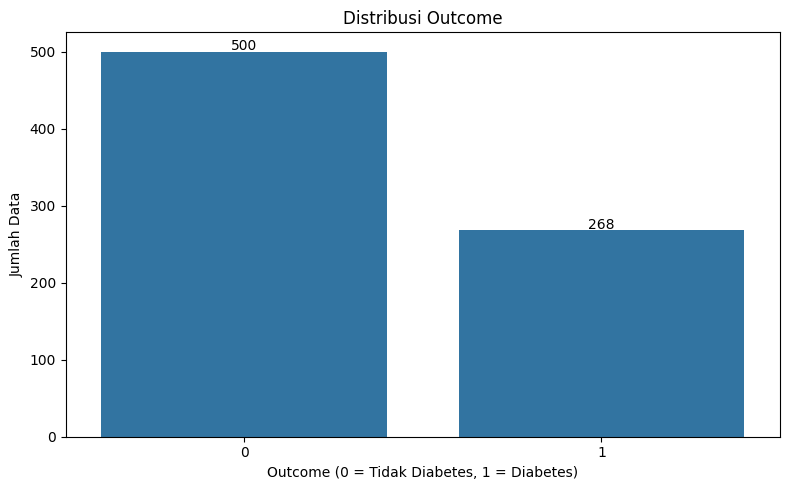

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat plot dan simpan axis-nya
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Outcome', data=df)
plt.title('Distribusi Outcome')
plt.xlabel('Outcome (0 = Tidak Diabetes, 1 = Diabetes)')
plt.ylabel('Jumlah Data')

# Tambahkan label jumlah di atas tiap batang
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., count + 2, str(count), ha='center')

plt.tight_layout()
plt.show()

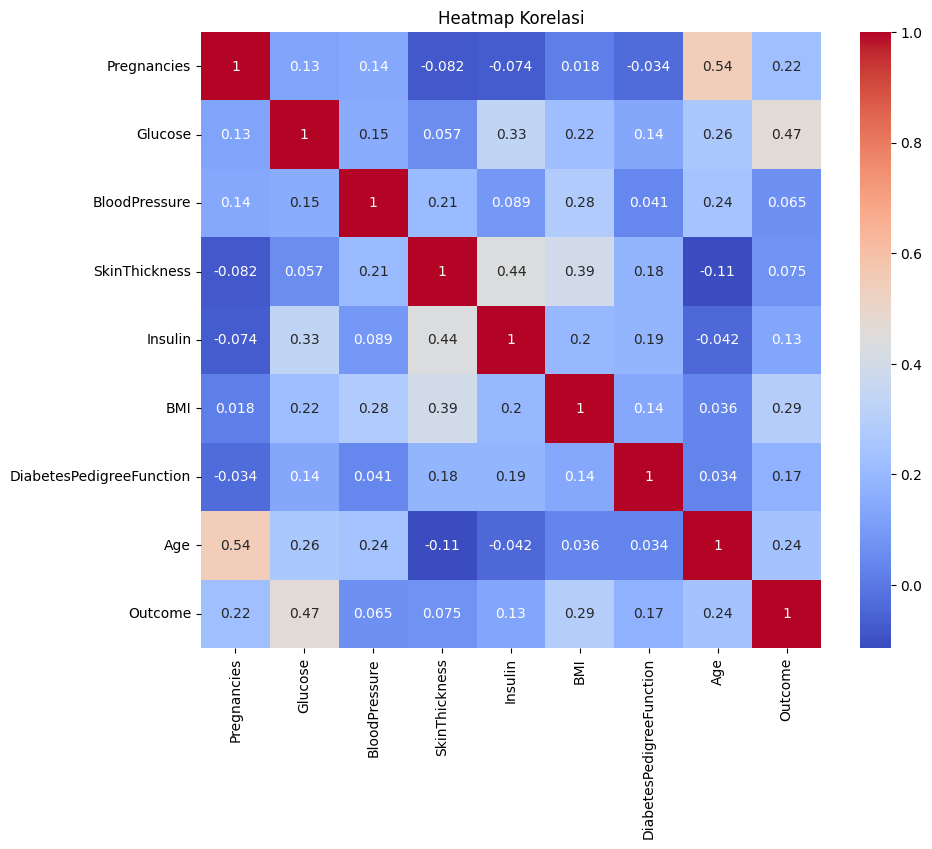

In [105]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

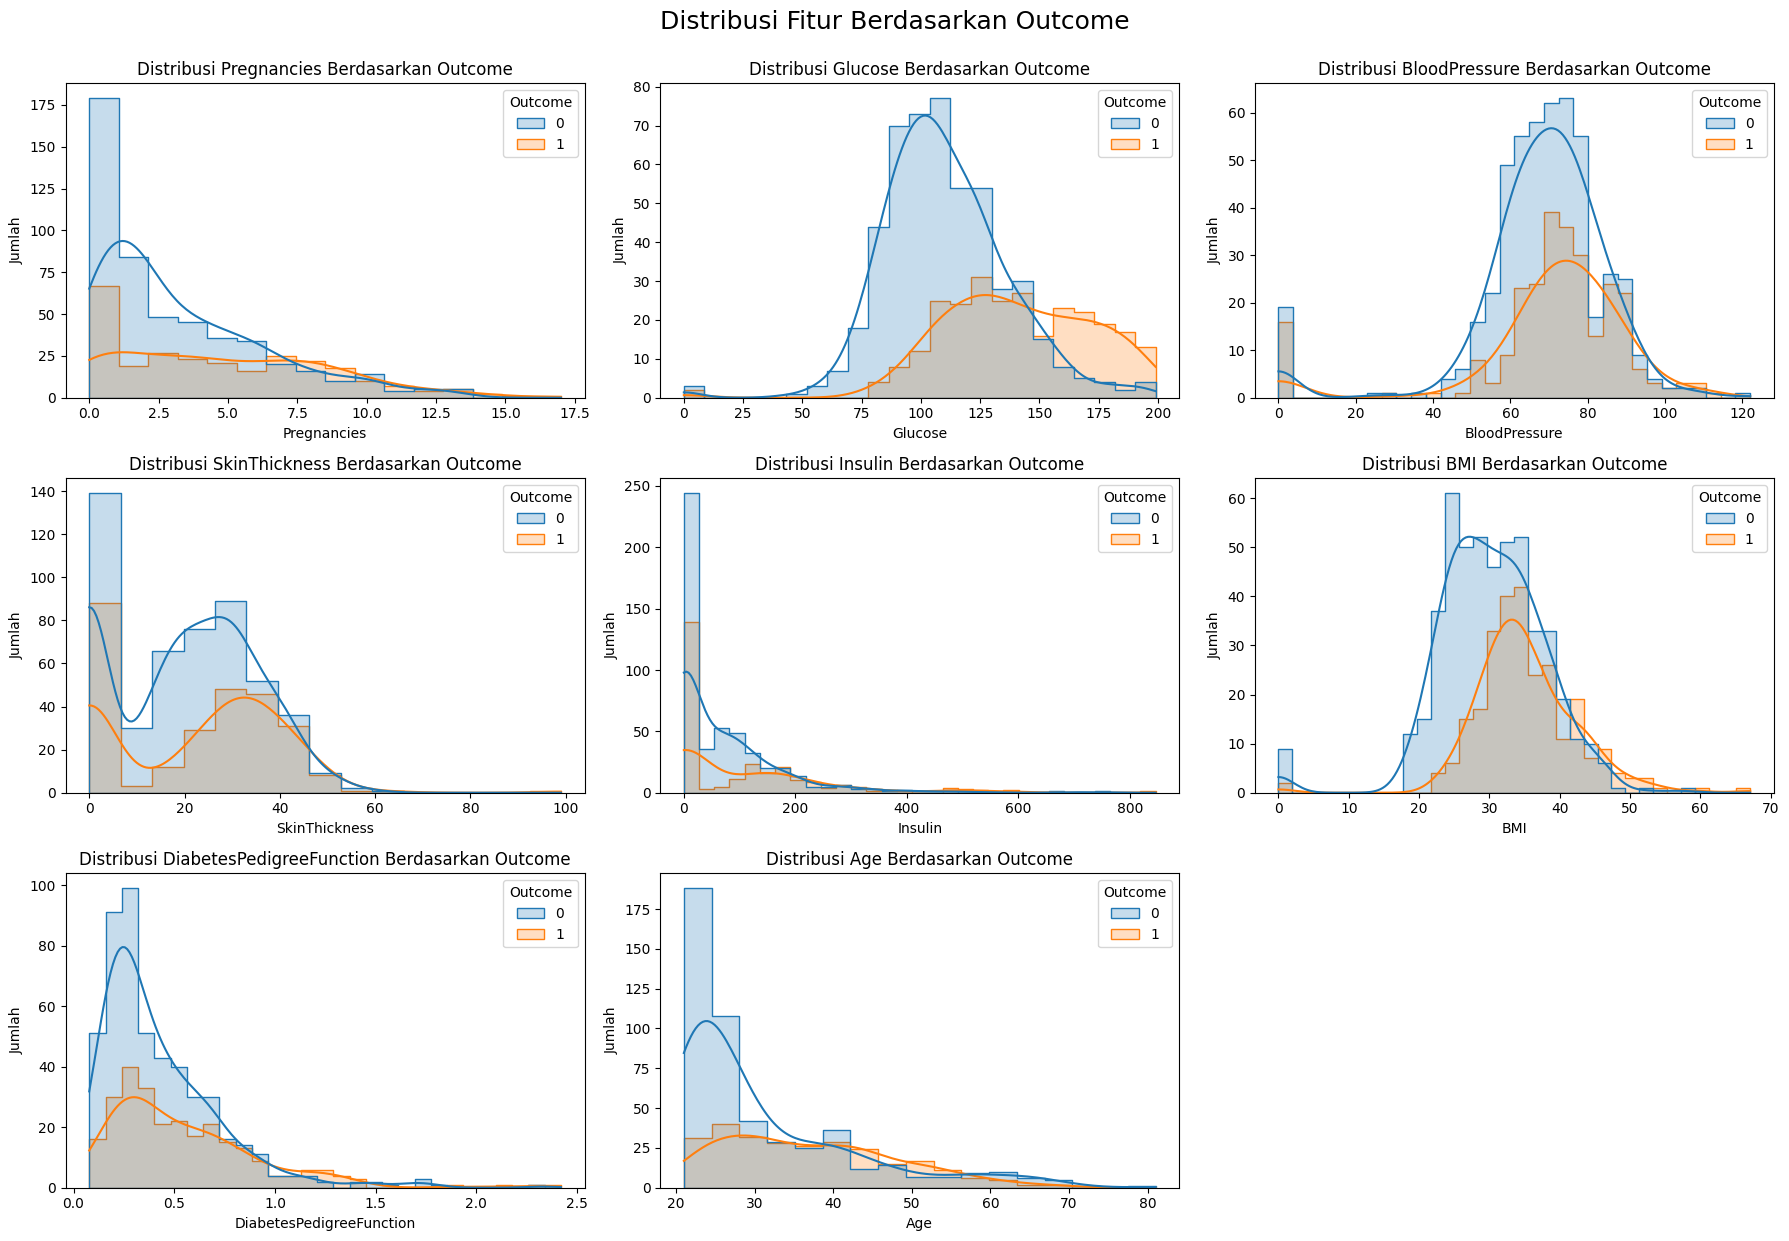

In [106]:
# Daftar fitur yang ingin divisualisasikan
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot setiap fitur
for i, col in enumerate(features):
    sns.histplot(data=df, x=col, hue='Outcome', kde=True, element='step', ax=axes[i])
    axes[i].set_title(f'Distribusi {col} Berdasarkan Outcome')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')

for j in range(len(features), 9):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distribusi Fitur Berdasarkan Outcome', fontsize=18, y=1.03)
plt.show()

##### K-Means

In [107]:
# Simpan label asli (Outcome) untuk evaluasi
y_true = df['Outcome']

# Drop kolom Outcome dari data untuk clustering
X = df.drop('Outcome', axis=1)

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [108]:
# KMeans Clustering (k = 2 karena 2 kelas: diabetes / tidak)
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Karena KMeans tidak tahu label, kadang label 0 dan 1 bisa tertukar.
# Jadi kita bandingkan dua kemungkinan dan ambil yang lebih akurat
accuracy_1 = accuracy_score(y_true, y_kmeans)
accuracy_2 = accuracy_score(y_true, 1 - y_kmeans)

=== Evaluasi K-Means Clustering ===
Accuracy : 0.6614583333333334
Precision: 0.5131578947368421
Recall   : 0.582089552238806
F1 Score : 0.5454545454545454


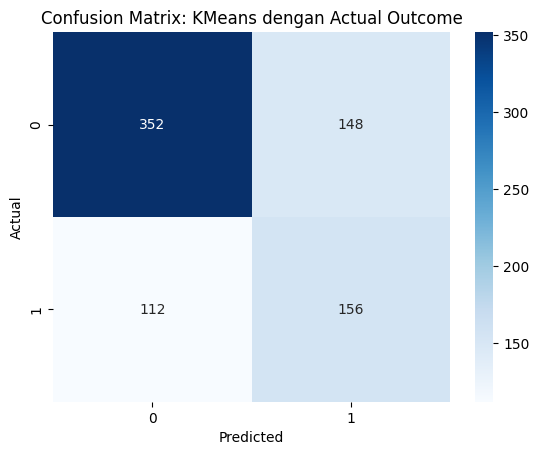

In [109]:
# Ambil prediksi terbaik
if accuracy_1 > accuracy_2:
    y_pred = y_kmeans
else:
    y_pred = 1 - y_kmeans  # dibalik

# Evaluasi
print("=== Evaluasi K-Means Clustering ===")
print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall   :", recall_score(y_true, y_pred))
print("F1 Score :", f1_score(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: KMeans dengan Actual Outcome")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

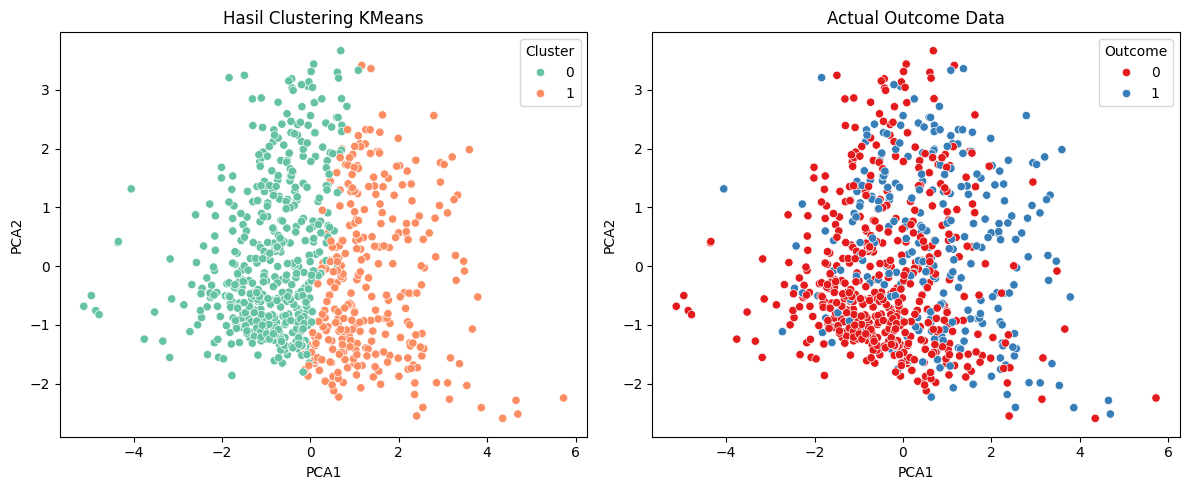

In [110]:
# Visualisasi hasil clustering vs Outcome menggunakan PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Tambahkan ke dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df['Cluster'] = y_pred

# Visualisasi Clustering Result
plt.figure(figsize=(12, 5))

# Hasil Cluster dari KMeans
plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title('Hasil Clustering KMeans')

# Outcome asli dari dataset
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='Outcome', data=df, palette='Set1')
plt.title('Actual Outcome Data')

plt.tight_layout()
plt.show()

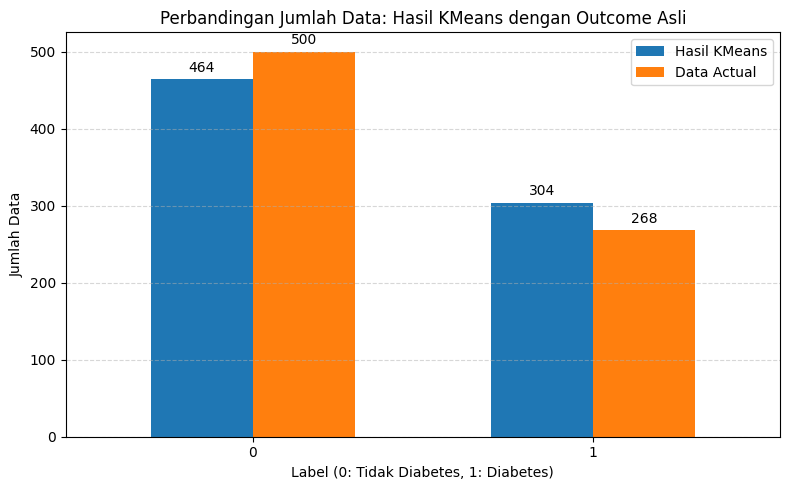

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah data per cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Hitung jumlah data per outcome
outcome_counts = df['Outcome'].value_counts().sort_index()

# Gabungkan ke dalam satu DataFrame
compare_df = pd.DataFrame({
    'Hasil KMeans': cluster_counts,
    'Data Actual': outcome_counts
})

# Pastikan index 0 dan 1
compare_df = compare_df.sort_index()

# Plot grouped bar chart dan simpan axis
ax = compare_df.plot(kind='bar', figsize=(8, 5), width=0.6)
plt.title('Perbandingan Jumlah Data: Hasil KMeans dengan Outcome Asli')
plt.xlabel('Label (0: Tidak Diabetes, 1: Diabetes)')
plt.ylabel('Jumlah Data')
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='upper right')
plt.tight_layout()

# Tambahkan label di atas tiap bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.show()


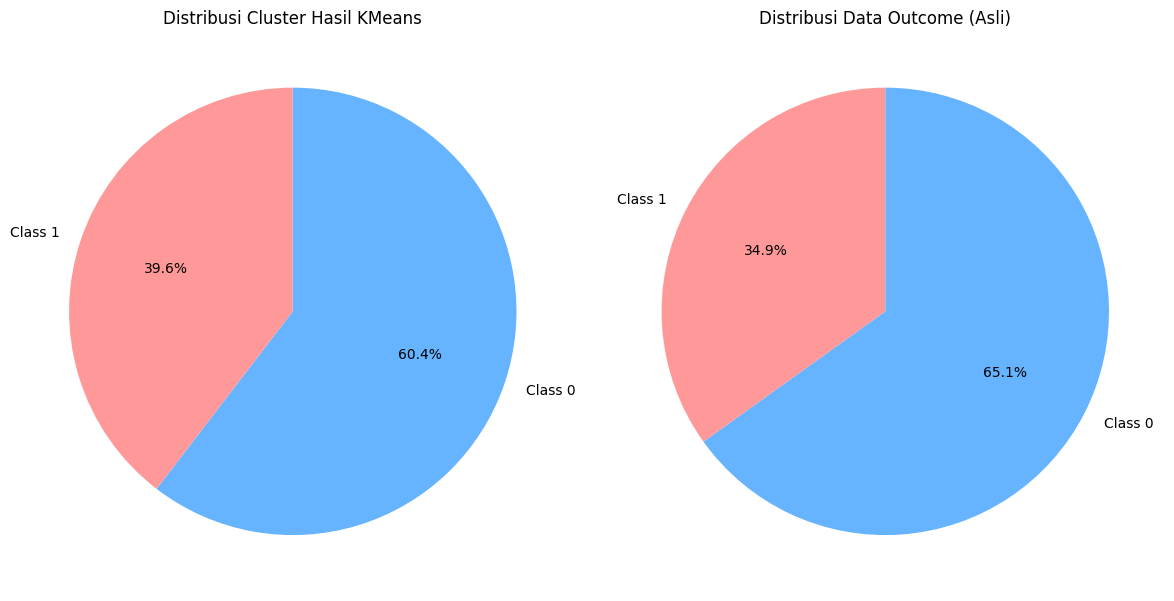

In [112]:
import matplotlib.pyplot as plt

# Hitung jumlah data per cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Hitung jumlah data per outcome
outcome_counts = df['Outcome'].value_counts().sort_index()

# Setup label dan warna agar konsisten
labels = ['Class 0', 'Class 1']
colors = ['#66b3ff', '#ff9999']

# Buat 2 pie chart berdampingan
plt.figure(figsize=(12, 6))

# Pie Chart 1 - Hasil KMeans
plt.subplot(1, 2, 1)
plt.pie(cluster_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Distribusi Cluster Hasil KMeans')

# Pie Chart 2 - Outcome Asli
plt.subplot(1, 2, 2)
plt.pie(outcome_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Distribusi Data Outcome (Asli)')

plt.tight_layout()
plt.show()

##### Hasil KNN lanjutan KMeans 2 cluster

🔍 Evaluasi Akurasi untuk Berbagai Nilai k:
k = 1 ➜ Akurasi = 92.86%
k = 3 ➜ Akurasi = 93.51%
k = 5 ➜ Akurasi = 91.56%
k = 7 ➜ Akurasi = 90.91%
k = 9 ➜ Akurasi = 90.26%
k = 11 ➜ Akurasi = 90.91%

✅ Model KNN terbaik: k = 3 dengan akurasi = 93.51%
📉 MSE untuk model KNN terbaik (k=3) adalah: 0.0649


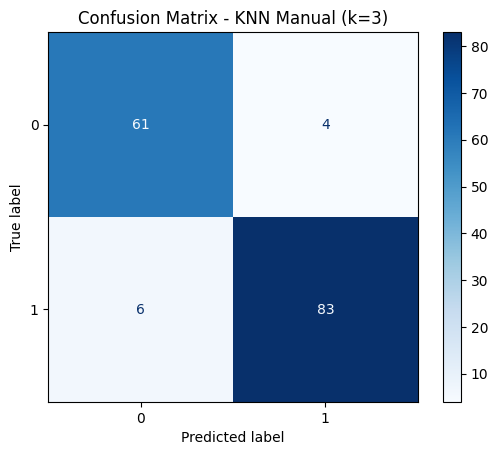

In [114]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
import matplotlib.pyplot as plt

# === 1. LOAD DATA ===
df = pd.read_csv("pima_indians_diabetes_with_header.csv")
df = df.dropna()

# === 2. NORMALISASI & KMEANS ===
X_features = df.drop(columns='Outcome')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster_Outcome'] = kmeans.fit_predict(X_scaled)

# === 3. PISAHKAN FITUR DAN LABEL BARU ===
X = X_features.values
y = df['Cluster_Outcome'].values

# === 4. SPLIT DATA ===
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# === 5. DEFINISI JARAK EUCLIDEAN ===
def euclidean_distance(p1, p2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))

# === 6. KLASIFIKASI KNN MANUAL ===
def classify_point(X_train, y_train, p, k=5):
    distances = []
    for xi, yi in zip(X_train, y_train):
        dist = euclidean_distance(p, xi)
        distances.append((dist, yi))
    distances = sorted(distances)[:k]
    freq_0 = sum(1 for d in distances if d[1] == 0)
    freq_1 = sum(1 for d in distances if d[1] == 1)
    return 0 if freq_0 > freq_1 else 1

# === 7. MENCARI K TERBAIK ===
best_k = None
best_accuracy = 0
best_y_pred = []

print("🔍 Evaluasi Akurasi untuk Berbagai Nilai k:")
for k in [1, 3, 5, 7, 9, 11]:
    y_pred = []
    for p in X_test:
        pred = classify_point(X_train, y_train, p, k)
        y_pred.append(pred)

    correct = sum(1 for true, pred in zip(y_test, y_pred) if true == pred)
    accuracy = correct / len(y_test) * 100
    print(f"k = {k} ➜ Akurasi = {accuracy:.2f}%")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_y_pred = y_pred.copy()

# === 8. CETAK HASIL TERBAIK ===
print(f"\n✅ Model KNN terbaik: k = {best_k} dengan akurasi = {best_accuracy:.2f}%")
mse = mean_squared_error(y_test, best_y_pred)
print(f"📉 MSE untuk model KNN terbaik (k={best_k}) adalah: {mse:.4f}")

# === 9. CONFUSION MATRIX ===
cm = confusion_matrix(y_test, best_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix - KNN Manual (k={best_k})")
plt.show()


In [115]:
from sklearn.metrics import accuracy_score

# === 1. Akurasi KNN terhadap Label Asli ===
accuracy_knn_vs_true = accuracy_score(df['Outcome'][split:], best_y_pred)

# === 2. Akurasi KNN terhadap Hasil KMeans ===
accuracy_knn_vs_kmeans = accuracy_score(df['Cluster_Outcome'][split:], best_y_pred)

# === 3. Tampilkan Hasil Perbandingan ===
print("📊 Perbandingan Akurasi KNN")
print(f"Akurasi KNN dengan Label Asli (Outcome):        {accuracy_knn_vs_true:.2%}")
print(f"Akurasi KNN dengan Cluster KMeans :   {accuracy_knn_vs_kmeans:.2%}")

📊 Perbandingan Akurasi KNN
Akurasi KNN dengan Label Asli (Outcome):        41.56%
Akurasi KNN dengan Cluster KMeans :   93.51%


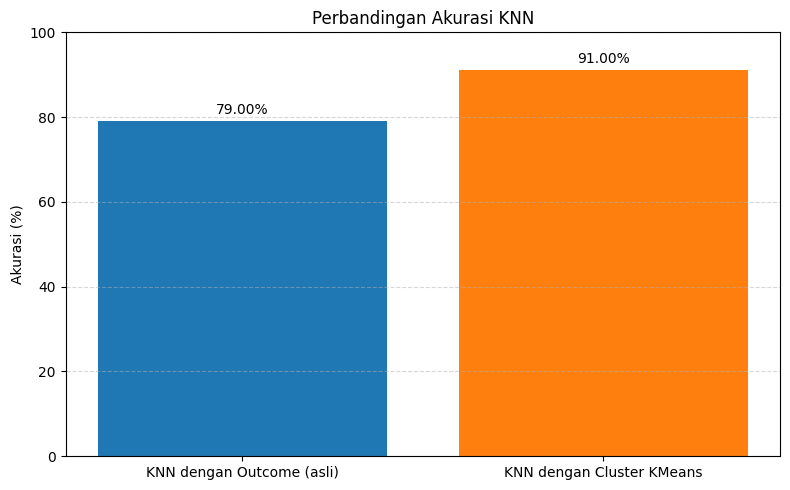

In [121]:
import matplotlib.pyplot as plt

# Asumsikan nilai akurasi sudah dihitung sebelumnya
# Gantilah dua variabel ini sesuai hasil dari evaluasi kamu:
accuracy_knn_vs_true = 0.79  # misalnya 79% akurasi terhadap Outcome
accuracy_knn_vs_kmeans = 0.91  # misalnya 91% akurasi terhadap Cluster_Outcome

# Data untuk plot
labels = ['KNN dengan Outcome (asli)', 'KNN dengan Cluster KMeans']
accuracies = [accuracy_knn_vs_true * 100, accuracy_knn_vs_kmeans * 100]

# Visualisasi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, accuracies, color=['#1f77b4', '#ff7f0e'])
plt.ylim(0, 100)
plt.ylabel("Akurasi (%)")
plt.title("Perbandingan Akurasi KNN")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Tambahkan label akurasi di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,
             f'{height:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


📊 Evaluasi KNN terhadap Label Asli (Outcome):

Akurasi  : 41.56%
Precision: 29.89%
Recall   : 47.27%
F1-Score : 36.62%

Classification Report:

              precision    recall  f1-score   support

           0       0.57      0.38      0.46        99
           1       0.30      0.47      0.37        55

    accuracy                           0.42       154
   macro avg       0.43      0.43      0.41       154
weighted avg       0.47      0.42      0.43       154



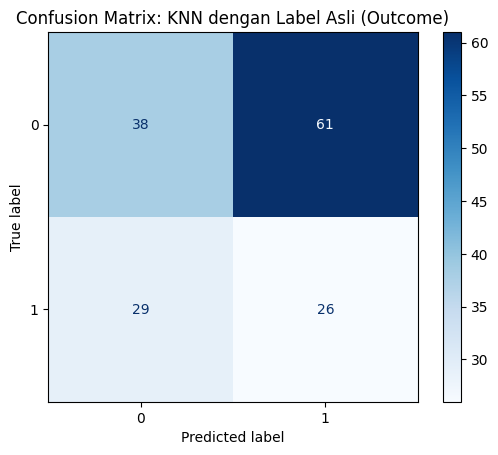


📊 Evaluasi KNN terhadap Cluster dari KMeans:

Akurasi  : 93.51%
Precision: 95.40%
Recall   : 93.26%
F1-Score : 94.32%

Classification Report (vs Cluster KMeans):

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        65
           1       0.95      0.93      0.94        89

    accuracy                           0.94       154
   macro avg       0.93      0.94      0.93       154
weighted avg       0.94      0.94      0.94       154



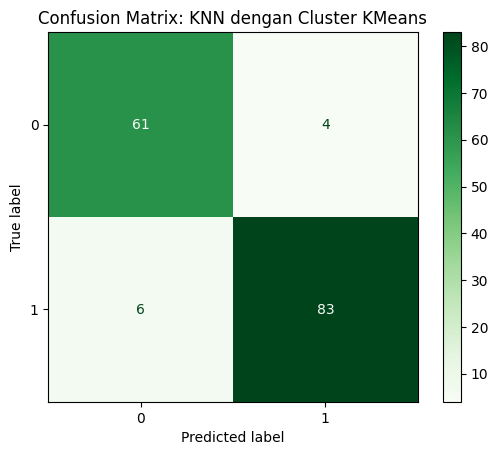

In [117]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# === 1. EVALUASI terhadap Label Asli (Outcome) ===
y_true_outcome = df['Outcome'][split:]
y_pred_knn = best_y_pred

print("📊 Evaluasi KNN terhadap Label Asli (Outcome):\n")
print(f"Akurasi  : {accuracy_score(y_true_outcome, y_pred_knn):.2%}")
print(f"Precision: {precision_score(y_true_outcome, y_pred_knn):.2%}")
print(f"Recall   : {recall_score(y_true_outcome, y_pred_knn):.2%}")
print(f"F1-Score : {f1_score(y_true_outcome, y_pred_knn):.2%}")

# Tampilkan classification report lengkap
print("\nClassification Report:\n")
print(classification_report(y_true_outcome, y_pred_knn))

# === 2. Confusion Matrix: KNN vs Outcome ===
cm1 = confusion_matrix(y_true_outcome, y_pred_knn)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=[0, 1])
disp1.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: KNN dengan Label Asli (Outcome)")
plt.show()

# === 3. EVALUASI terhadap Cluster KMeans ===
y_true_kmeans = df['Cluster_Outcome'][split:]

print("\n📊 Evaluasi KNN terhadap Cluster dari KMeans:\n")
print(f"Akurasi  : {accuracy_score(y_true_kmeans, y_pred_knn):.2%}")
print(f"Precision: {precision_score(y_true_kmeans, y_pred_knn):.2%}")
print(f"Recall   : {recall_score(y_true_kmeans, y_pred_knn):.2%}")
print(f"F1-Score : {f1_score(y_true_kmeans, y_pred_knn):.2%}")

# Tampilkan classification report lengkap
print("\nClassification Report (vs Cluster KMeans):\n")
print(classification_report(y_true_kmeans, y_pred_knn))

# === 4. Confusion Matrix: KNN vs Cluster KMeans ===
cm2 = confusion_matrix(y_true_kmeans, y_pred_knn)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0, 1])
disp2.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix: KNN dengan Cluster KMeans")
plt.show()


In [118]:
# Membalik label hasil clustering
df['Cluster_Outcome'] = 1 - df['Cluster_Outcome']

In [119]:
print(pd.crosstab(df['Outcome'], df['Cluster_Outcome'], rownames=['Outcome'], colnames=['Cluster_Outcome'], margins=True))

Cluster_Outcome    0    1  All
Outcome                       
0                352  148  500
1                112  156  268
All              464  304  768
